In [2]:
import numpy as np 
from scipy import constants as c 
import matplotlib.pyplot as plt 
from scipy import signal as sig 

(0.0, 0.0022222222222222222)

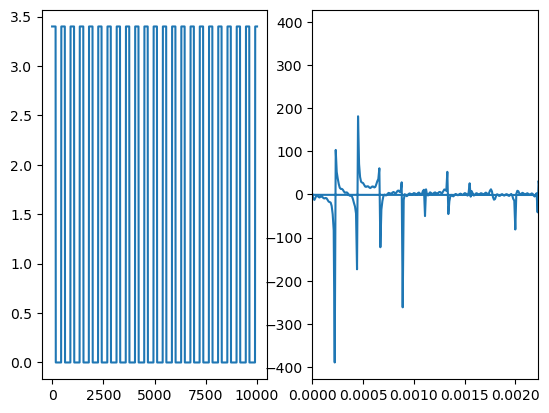

In [3]:
fig,ax = plt.subplots(1,2)
x = np.linspace(0,10000,1000)
du = 86*2/450
nx = 3.4*.5*(1+sig.square(2*np.pi*x/450,duty=du))
ax[0].plot(x,nx)
ftransform = np.fft.fft(nx)
ffreq = np.fft.fftfreq(1000,100000/1000)
ax[1].plot(ffreq,np.imag(ftransform))
ax[1].set_xlim(0,1/450)



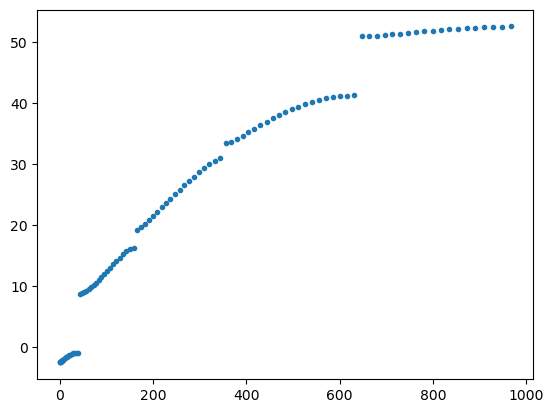

In [6]:

#Section 1
m = 1 ;hb = 1; w = 1 # define physical constants 

#section 2 
N = 100 #  Number of steps
c = 1 # width of potential well 
L = 10*c #width of simulation window
a = -L; b =L #bounds of window
x = np.linspace(a,b,N+1) # generate x space 
dx = x[1]-x[0] #define differential step 

#Section 3 
E0 = hb/(dx**2)*(-2*np.eye(N-1)+np.diag(np.ones(N-2),1)+np.diag(np.ones(N-2),-1))#define differential matrix  


v0 = (1/2/m*w*x) 
v = np.diag(v0[1:-1])
v1 = 10*np.cos(2*np.pi/c*x)
V = np.diag(v1[1:-1])
H1 = -E0
H = -E0/2/m*hb+V

#section 4
D1,fx1 = np.linalg.eig(H1)
D,fx2 = np.linalg.eig(H)
n = np.arange(1,N)
E00 =(np.pi/L*n)**2 

k = np.asarray([ 2*np.pi*(i/(dx*N)-np.floor(i/(dx*N)))  for i in range(N-1) ])

#section 5
plt.plot(E00,np.sort(D),'.') 

## First section: 
Define constants to be 1 (electron mass hbar etc) 

## Second section: 
Generate the x space for the potential 

## Third section : Define the following matrices
 
### 1st the second order differential matrix for the kinetic energy term   
$$ E_0 = hb/dx^2*(-2*np.eye(N-1))+np.diag(np.ones(N-2),1)+np.diag(np.ones(N-2),-1)$$
$$ =\frac{\hbar}{dx^2 }  
        \begin{pmatrix}
        2 & 1 & 0 & ...\\
        1 & 2 & 1 & ...\\
        0 & 1 & 2 & ...\\ 
        ... & ... & ... & ...\\ 
        
        \end{pmatrix}
$$ 
Is the 100x100 finite difference matrix expression of a differentail element


### 2nd we create the potential equation 
$$ v1 = 10*np.cos(2*np.pi/c*x) = 10*Cos(\frac{2*\pi}{c}*x) $$
$$ V = np.diag(v1[2:-1]) = $$ 
$$ \begin{pmatrix}
        v1(x_1) & 0      & 0        & ...\\
        0       &v1(x_2) & 0        & ...\\
        0       & 0      & v1(x_3)  & ...\\ 
        ...     & ...    & ...      & ...\\ 
        
        \end{pmatrix}
$$ 
### 3rd we finally define the hamiltonain 
$$ H =  -E0/2/m*\hbar+V $$ 
Which is equivalent to: 
$$H = \frac{1}{2*m*\hbar}\frac{d}{dx} + V $$

### 4th solve for the eigen vectors of the hamiltonian 




In [47]:
E0

array([[-50.,   1.,   0., ...,   0.,   0.,   0.],
       [  1., -50.,   1., ...,   0.,   0.,   0.],
       [  0.,   1., -50., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., -50.,   1.,   0.],
       [  0.,   0.,   0., ...,   1., -50.,   1.],
       [  0.,   0.,   0., ...,   0.,   1., -50.]])

In [39]:
x

array([-10. ,  -9.9,  -9.8,  -9.7,  -9.6,  -9.5,  -9.4,  -9.3,  -9.2,
        -9.1,  -9. ,  -8.9,  -8.8,  -8.7,  -8.6,  -8.5,  -8.4,  -8.3,
        -8.2,  -8.1,  -8. ,  -7.9,  -7.8,  -7.7,  -7.6,  -7.5,  -7.4,
        -7.3,  -7.2,  -7.1,  -7. ,  -6.9,  -6.8,  -6.7,  -6.6,  -6.5,
        -6.4,  -6.3,  -6.2,  -6.1,  -6. ,  -5.9,  -5.8,  -5.7,  -5.6,
        -5.5,  -5.4,  -5.3,  -5.2,  -5.1,  -5. ,  -4.9,  -4.8,  -4.7,
        -4.6,  -4.5,  -4.4,  -4.3,  -4.2,  -4.1,  -4. ,  -3.9,  -3.8,
        -3.7,  -3.6,  -3.5,  -3.4,  -3.3,  -3.2,  -3.1,  -3. ,  -2.9,
        -2.8,  -2.7,  -2.6,  -2.5,  -2.4,  -2.3,  -2.2,  -2.1,  -2. ,
        -1.9,  -1.8,  -1.7,  -1.6,  -1.5,  -1.4,  -1.3,  -1.2,  -1.1,
        -1. ,  -0.9,  -0.8,  -0.7,  -0.6,  -0.5,  -0.4,  -0.3,  -0.2,
        -0.1,   0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,
         0.8,   0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,
         1.7,   1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,
         2.6,   2.7,

In [18]:
np.linspace(0,10,10)

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

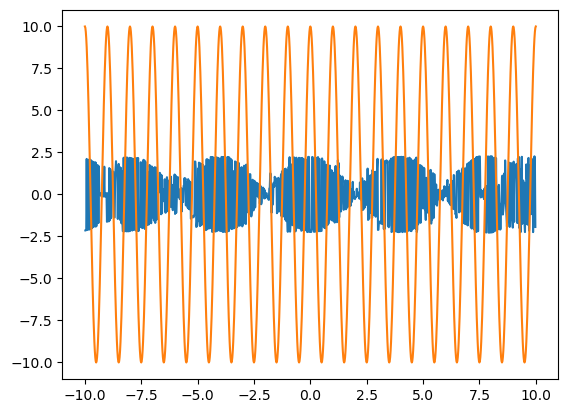

In [83]:
plt.plot(x[1:-1],50*fx2[994])
plt.plot(x,v1)